<a href="https://colab.research.google.com/github/santiagoroselyn/MIT504/blob/main/Activity%202%3A%20Time%20Series%20Analysis%20-%20Renewable%20Energy%20Consumption%20in%20the%20US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Analysis with ARIMA Model - Renewable Energy Consumption in the US

**1. Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

**2. Load Dataset**

In [6]:
data = pd.read_csv("/content/sample_data/renewable_energy_consumption_US.csv")

**3. Convert Year to Day Time**

In [24]:
data['Year'] = pd.date_range(start='1973-01', periods=len(data), freq='M')
data.set_index('Year', inplace=True)

**4. Plot the time Series**

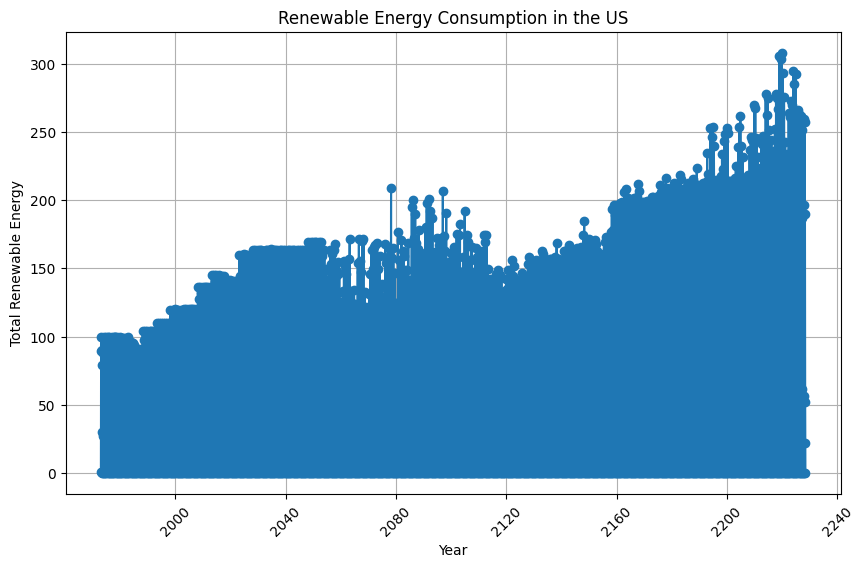

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Total Renewable Energy'], marker='o', linestyle='-')
plt.title('Renewable Energy Consumption in the US')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**5. Decomposition**

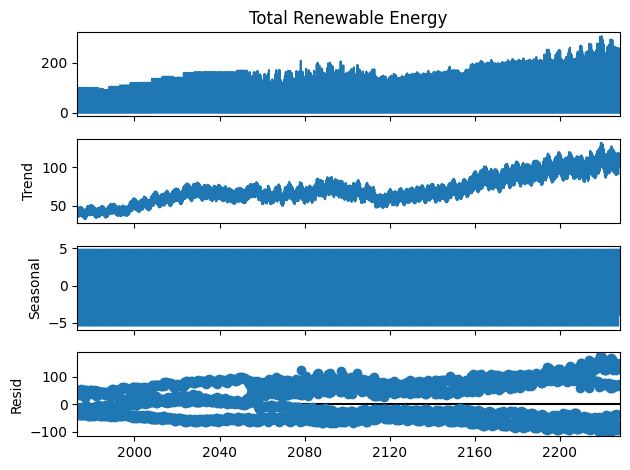

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Total Renewable Energy'], model='additive', period=12)

fig = decomposition.plot()
plt.show()

 **6. Fit an ARIMA Model**

In [31]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Total Renewable Energy'], order=(5, 1, 0))
results = model.fit()

print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     Total Renewable Energy   No. Observations:                 3065
Model:                     ARIMA(5, 1, 0)   Log Likelihood              -10738.764
Date:                    Sat, 06 Jul 2024   AIC                          21489.529
Time:                            08:45:41   BIC                          21525.694
Sample:                        01-31-1973   HQIC                         21502.523
                             - 05-31-2228                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7757      0.016    -49.197      0.000      -0.807      -0.745
ar.L2         -0.7777      0.016    -47.802      0.000      -0.810      -0.746
ar.L3         -0.784

# **7. Forecasting Future Values**

<function matplotlib.pyplot.show(close=None, block=None)>

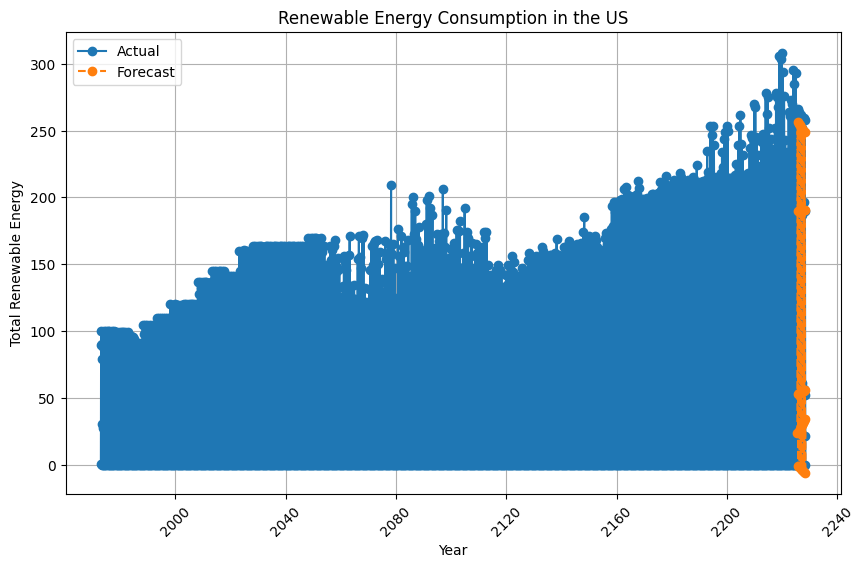

In [33]:
forecast = results.forecast(steps=36)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Total Renewable Energy'], marker='o', linestyle='-', label='Actual')
plt.plot(data.index[-len(forecast):], forecast, marker='o', linestyle='--', label='Forecast')
plt.title('Renewable Energy Consumption in the US')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show